<a href="https://colab.research.google.com/github/ericcandido/portfolio-analise-dados/blob/main/Explora%C3%A7%C3%A3o_e_Limpeza_de_Dados_%E2%80%94_%5BNetflix%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas e do dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/ericcandido/portfolio-analise-dados/refs/heads/main/netflix_titles.csv')
df.head()
df.shape, df.columns.tolist()

((8807, 12),
 ['show_id',
  'type',
  'title',
  'director',
  'cast',
  'country',
  'date_added',
  'release_year',
  'rating',
  'duration',
  'listed_in',
  'description'])

# Visão geral dos dados

In [ ]:
df.head()
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s8807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Zubaan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
linhas, colunas = df.shape[0], df.shape[1]
print("linhas: ", linhas)
print("colunas: ", colunas)

linhas:  8807
colunas:  12


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
df['listed_in'].value_counts()

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Action & Adventure, Cult Movies",1
"Action & Adventure, Comedies, Music & Musicals",1
"Classic Movies, Horror Movies, Thrillers",1


# Limpeza Inicial

In [ ]:
# Retirando duplicatas
df.drop_duplicates(subset=['show_id'], inplace=True)

In [ ]:
# Verificando porcentagens de nulos
null_pct = df.isnull().mean().sort_values(ascending=False)
null_pct

,0
director,0.299080
country,0.094357
cast,0.093675
date_added,0.001135
rating,0.000454
duration,0.000341
show_id,0.000000
type,0.000000
title,0.000000
release_year,0.000000


In [ ]:
# Preenchendo células nulas nas colunas "director", "cast" e "country" com "Unkown"
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,98
release_year,0
rating,4
duration,3


In [ ]:
df['date_added_year'] = df['date_added'].dt.year
df['date_added_month'] = df['date_added'].dt.month
df['release_year'] = df['release_year'].astype('Int64')
# df.info()
# df['release_year'].unique()
df['date_added_year'].unique()

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2009., 2008.,   nan, 2010.])

# Limpeza de colunas textuais

In [ ]:
df['duration'].value_counts()

,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,152
97 min,146
...,...
228 min,1
18 min,1
205 min,1


In [ ]:
# Separando "duration" entre "duration_num" e "duration_type"
def parse_duration(x):
    if pd.isna(x): return np.nan
    if 'Season' in x:
        return int(x.split()[0]), 'Seasons'
    if 'min' in x:
        return int(x.replace(' min','')), 'Minutes'
    return np.nan, np.nan

df[['duration_num','duration_type']] = df['duration'].apply(lambda x: pd.Series(parse_duration(x)))
df['duration_type'].value_counts()

,count
duration_type,
Minutes,6128
Seasons,2676


In [ ]:
df['listed_in'].value_counts()

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Action & Adventure, Cult Movies",1
"Action & Adventure, Comedies, Music & Musicals",1
"Classic Movies, Horror Movies, Thrillers",1


In [ ]:
# Separando "listed_in" em "genres_list" e "main_genre"
df['genres_list'] = df['listed_in'].str.split(', ')
df['main_genre'] = df['genres_list'].apply(lambda x: x[0] if isinstance(x, list) else 'Unknown')
df['main_genre'].value_counts()

,count
main_genre,
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
International TV Shows,774
Children & Family Movies,605
Crime TV Shows,399
Kids' TV,388
Stand-Up Comedy,334


In [ ]:
df['country'].value_counts()

,count
country,
United States,2818
India,972
Unknown,831
United Kingdom,419
Japan,245
...,...
"Germany, Canada, United States",1
"Denmark, United Kingdom, South Africa, Sweden, Belgium",1
"Serbia, South Korea, Slovenia",1


In [ ]:
# Criando uma coluna "main_country" a partir de "country"
df['main_country'] = df['country'].str.split(', ').apply(lambda x: x[0] if isinstance(x, list) else 'Unknown')
df['main_country'].value_counts()

,count
main_country,
United States,3210
India,1008
Unknown,831
United Kingdom,626
Canada,271
...,...
Iran,1
Slovenia,1
Guatemala,1


# Análise Variada (Distribuições)

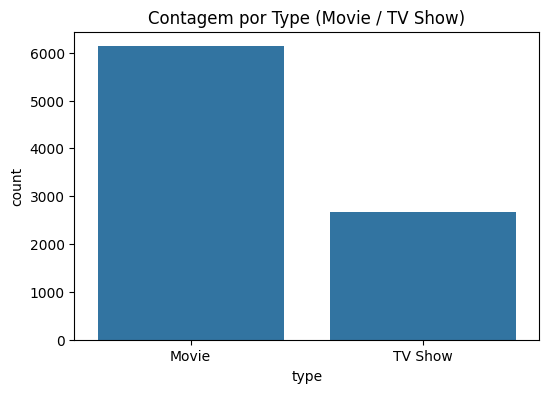

In [ ]:
# Tipo (Movie vs TV Show)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title('Contagem por Type (Movie / TV Show)')
plt.show()

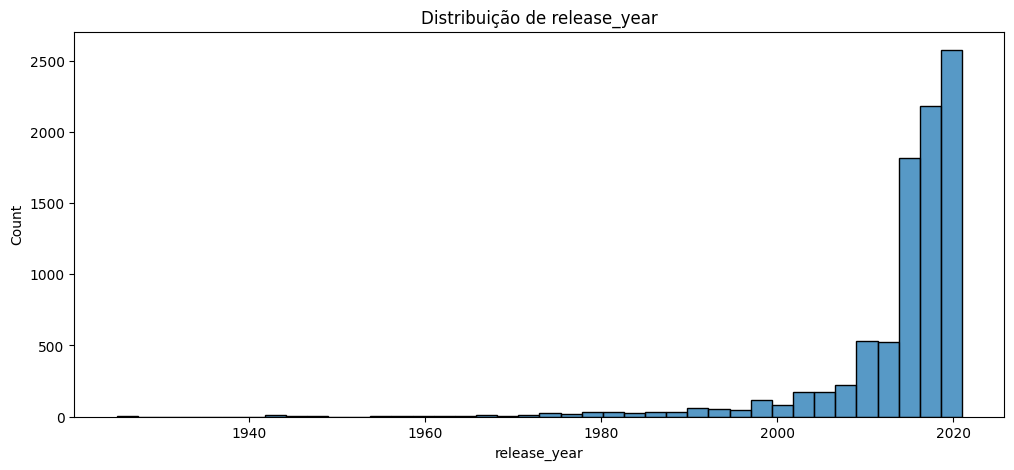

In [ ]:
# Distribuição de release_year e date_added_year
plt.figure(figsize=(12,5))
sns.histplot(df['release_year'].dropna(), bins=40)
plt.title('Distribuição de release_year')
plt.show()

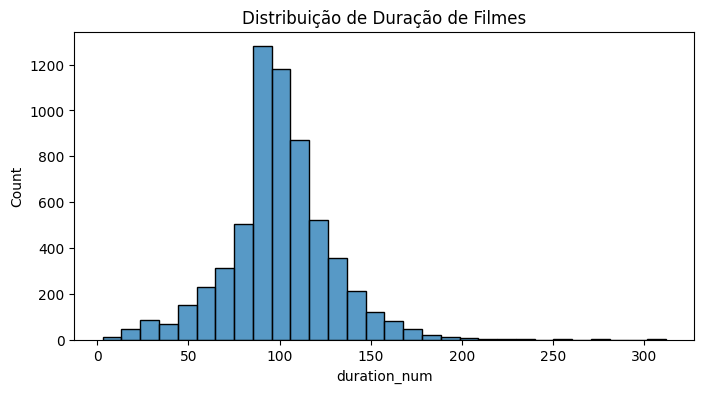

In [ ]:
# Duração de filmes
plt.figure(figsize=(8,4))
sns.histplot(df[df['duration_type']=='Minutes']['duration_num'].dropna(), bins=30)
plt.title('Distribuição de Duração de Filmes')
plt.show()

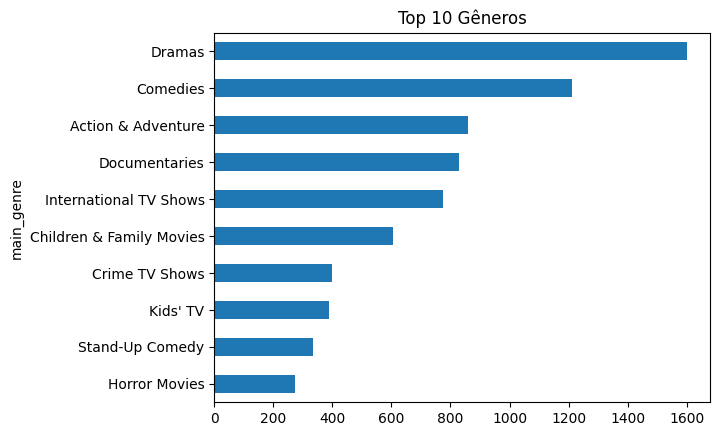

In [ ]:
# Top 10 gêneros
top_genres = df['main_genre'].value_counts().head(10)
top_genres.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Gêneros')
plt.show()

# Análises Bivariadas (insights de negócio)

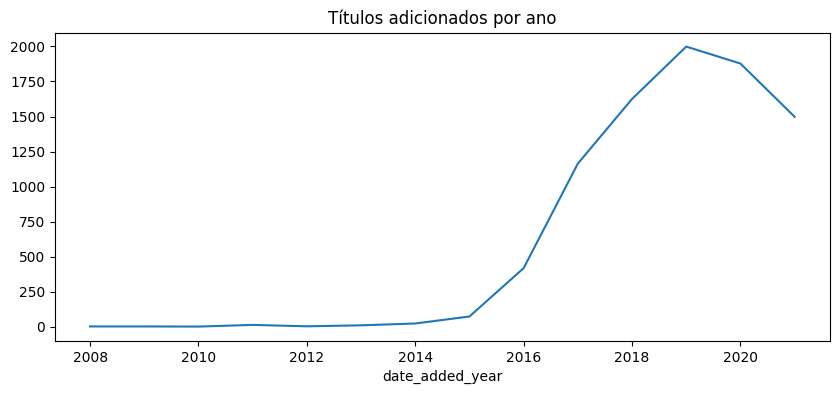

In [ ]:
# Evolução do catálogo ao longo do tempo
added_per_year = df.groupby('date_added_year')['show_id'].count().dropna()
added_per_year.plot(kind='line', figsize=(10,4))
plt.title('Títulos adicionados por ano')
plt.show()

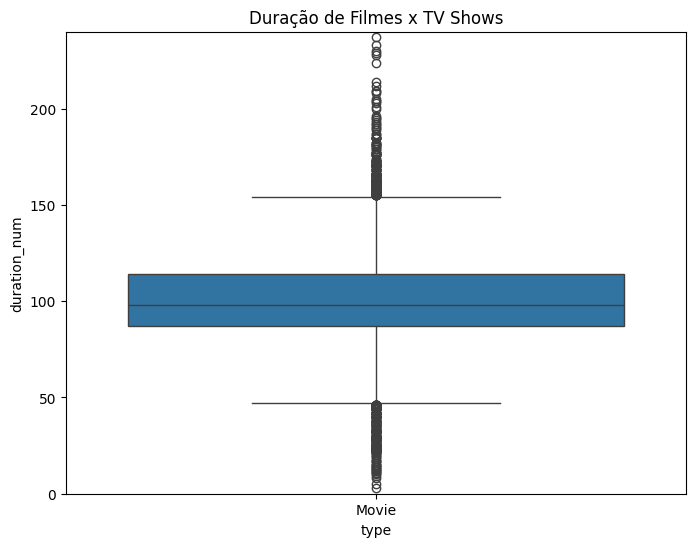

In [ ]:
# Tipo x Duração
plt.figure(figsize=(8,6))
sns.boxplot(x='type', y='duration_num', data=df[df['duration_type']=='Minutes'])
plt.ylim(0,240) # limite para melhor visualização
plt.title('Duração de Filmes x TV Shows')
plt.show()

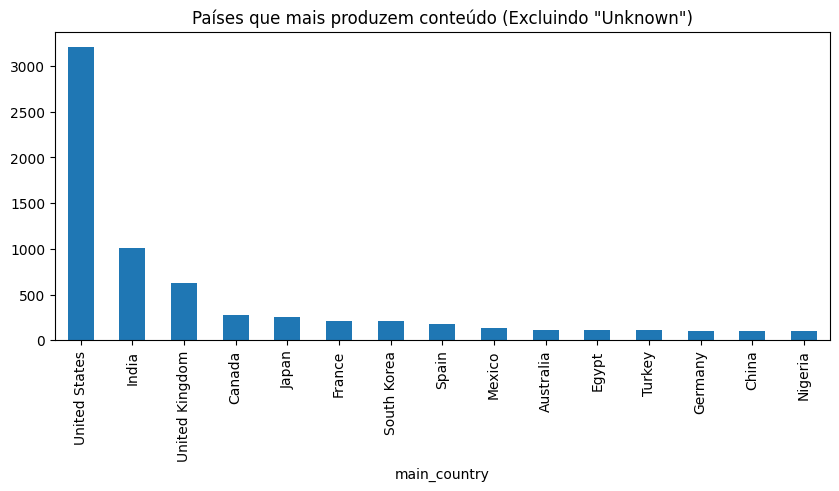

In [ ]:
# países que mais produzem conteúdo
top_countries = df[df['main_country'] != 'Unknown']['main_country'].value_counts().head(15)
top_countries.plot(kind='bar', figsize=(10,4))
plt.title('Países que mais produzem conteúdo (Excluindo "Unknown")')
plt.show()

In [ ]:
# gênero mais comum por país
pivot = df.pivot_table(index='main_country', columns='main_genre', values='show_id', aggfunc='count', fill_value=0 )
pivot.head()

main_genre,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
main_country,,,,,,,,,,,,,,,,,,,,,
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,2,0,0,0,2,1,1,9,7,0,...,0,8,0,0,0,0,0,0,0,0
Australia,8,0,0,2,14,0,3,3,7,0,...,0,3,0,0,3,1,0,0,0,1
Austria,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Bangladesh,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Utilizar Gemini para realizar mais 3 ou 4 insights

# Task
Analyze the Netflix content dataset to understand:
1. The annual evolution of Movies and TV Shows added to the catalog, visualizing the growth trend of each content type.
2. The top 10 directors by content contribution (excluding 'Unknown' directors).
3. The distribution of age ratings for content.
4. The gap between the original release year and the year content was added to Netflix, and summarize the key insights from these analyses.

## Evolução do Catálogo por Tipo

### Subtask:
Analisar a evolução anual do número de Filmes e Séries de TV adicionados à Netflix. Gerar um gráfico de linhas para visualizar a tendência de crescimento de cada tipo de conteúdo ao longo do tempo. Incluir uma legenda para diferenciar Filmes e Séries de TV.


**Reasoning**:
To analyze the annual evolution of content, I will group the data by 'date_added_year' and 'type', count the shows, unstack the 'type' column, and then plot the results as a line chart with appropriate labels and title.



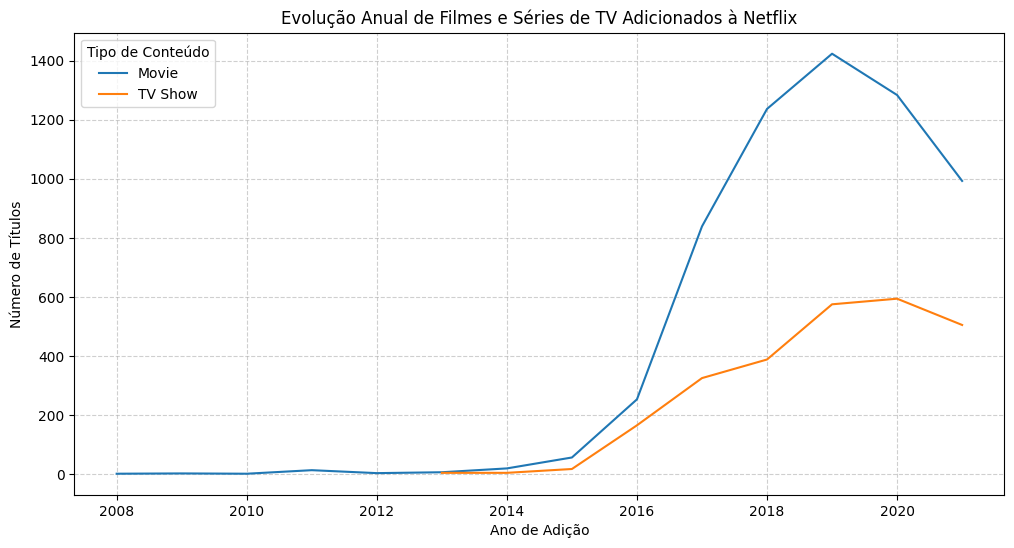

In [ ]:
added_per_year_type = df.groupby(['date_added_year', 'type'])['show_id'].count().unstack()

plt.figure(figsize=(12, 6))
added_per_year_type.plot(kind='line', ax=plt.gca())
plt.title('Evolução Anual de Filmes e Séries de TV Adicionados à Netflix')
plt.xlabel('Ano de Adição')
plt.ylabel('Número de Títulos')
plt.legend(title='Tipo de Conteúdo')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Top 10 Diretores com Mais Conteúdo

### Subtask:
Identificar e listar os 10 diretores que mais contribuíram com títulos para o catálogo da Netflix (excluindo 'Unknown'). Criar um gráfico de barras para exibir visualmente a contagem de títulos por diretor.


**Reasoning**:
To identify the top 10 directors, I will filter out 'Unknown' directors, count the occurrences of each director, select the top 10, and then visualize them using a bar plot.



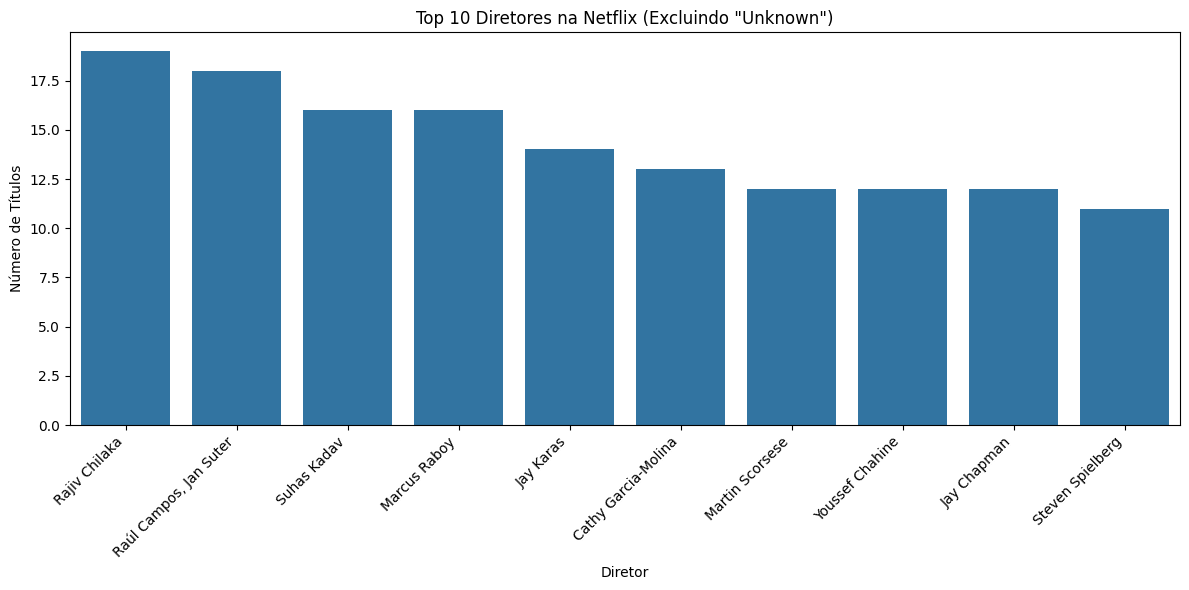

In [ ]:
directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=directors.index, y=directors.values)
plt.title('Top 10 Diretores na Netflix (Excluindo "Unknown")')
plt.xlabel('Diretor')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Distribuição das Classificações Etárias

### Subtask:
Analisar a distribuição das classificações etárias ('rating') do conteúdo na Netflix. Criar um gráfico de barras para visualizar a contagem de cada classificação etária, ordenado da mais frequente para a menos frequente. Ignorar valores nulos na coluna 'rating'. Incluir um título e rótulos para os eixos do gráfico.

**Reasoning**:
To analyze the distribution of age ratings, I will count the occurrences of each rating, drop any null values, and then visualize the top ratings using a bar plot with appropriate labels.



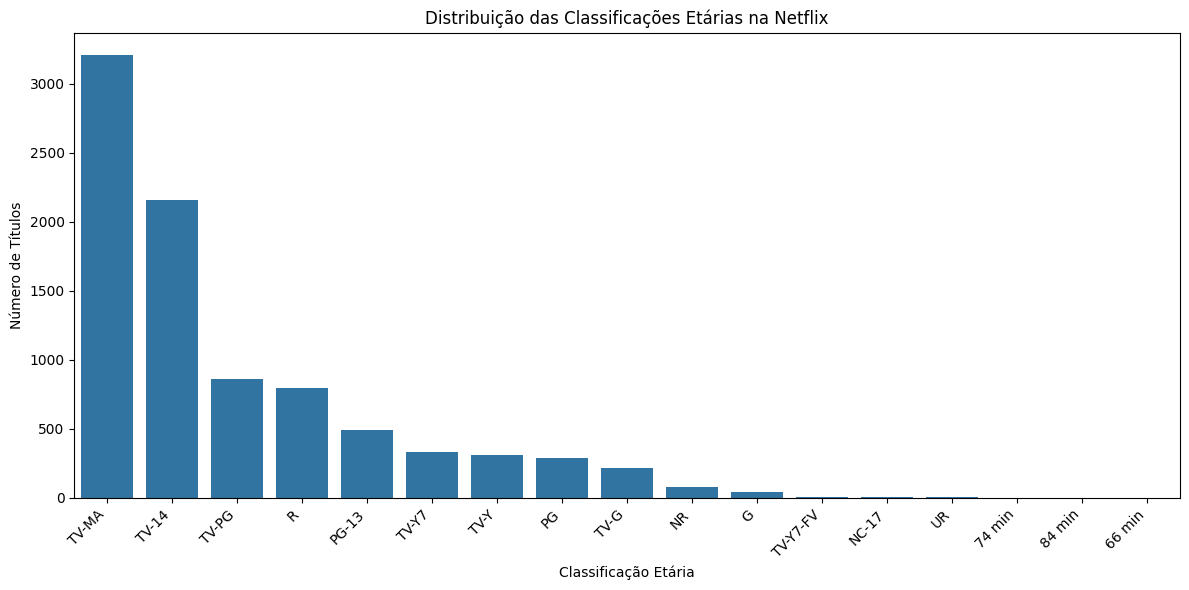

In [ ]:
ratings_distribution = df['rating'].value_counts().dropna()

plt.figure(figsize=(12, 6))
sns.barplot(x=ratings_distribution.index, y=ratings_distribution.values)
plt.title('Distribuição das Classificações Etárias na Netflix')
plt.xlabel('Classificação Etária')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Análise do Gap entre o Ano de Lançamento e o Ano de Adição na Netflix

### Subtask:
Calcular a diferença entre o `release_year` (ano de lançamento original) e o `date_added_year` (ano em que o conteúdo foi adicionado à Netflix). Criar um histograma para visualizar a distribuição desse "gap" (lacuna de tempo), ignorando valores nulos em ambas as colunas. Discutir os principais insights dessa análise.

**Reasoning**:
To analyze the gap between the release year and the year of addition, I will calculate the difference between 'date_added_year' and 'release_year' and then visualize its distribution using a histogram. I will ensure to drop null values for accurate calculation and plotting.



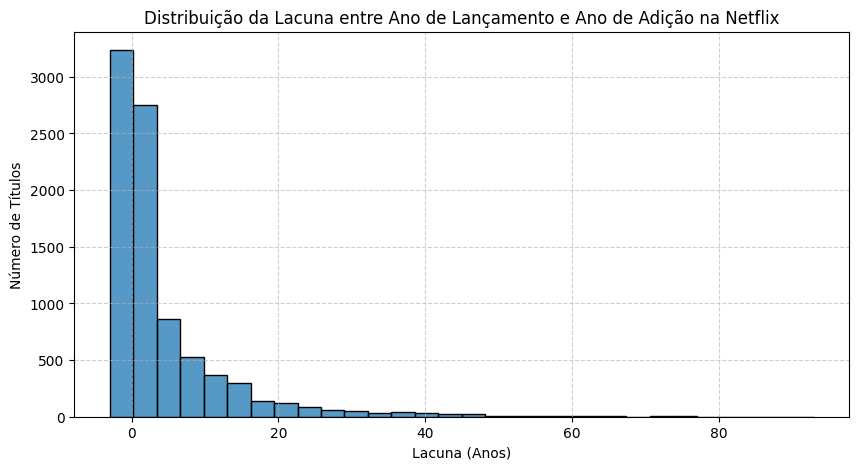

In [ ]:
df['gap'] = df['date_added_year'] - df['release_year']

plt.figure(figsize=(10, 5))
sns.histplot(df['gap'].dropna(), bins=30)
plt.title('Distribuição da Lacuna entre Ano de Lançamento e Ano de Adição na Netflix')
plt.xlabel('Lacuna (Anos)')
plt.ylabel('Número de Títulos')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Sumário e Insights Chave

### 1. Evolução do Catálogo por Tipo

O gráfico de linhas mostrando a evolução anual de Filmes e Séries de TV adicionados à Netflix revela um crescimento constante e acelerado no número de títulos ao longo dos anos, com um pico por volta de 2019-2020. Ambos os tipos de conteúdo seguiram uma tendência de aumento, com filmes geralmente superando séries em volume adicionado anualmente. No entanto, o crescimento de TV Shows também foi significativo, indicando a expansão da plataforma para além dos filmes.

### 2. Top 10 Diretores com Mais Conteúdo

A análise dos diretores mais prolíficos destacou a presença de diretores como Rajiv Chilaka e Raúl Campos, Jan Suter, que têm um número considerável de títulos na plataforma. Isso sugere que a Netflix investe em parcerias com diretores que produzem conteúdo em volume, possivelmente em nichos específicos ou regiões geográficas, como indicado pela frequência de diretores com produções como animações indianas.

### 3. Distribuição das Classificações Etárias

A distribuição das classificações etárias ('rating') mostrou que 'TV-MA' (para maiores de 17 anos) e 'TV-14' (para maiores de 14 anos) são as categorias mais predominantes no catálogo da Netflix. Isso indica uma forte inclinação da plataforma para conteúdo voltado a adolescentes e adultos, embora também haja uma presença considerável de conteúdo para toda a família ('TV-PG', 'TV-Y7', 'TV-Y', 'PG', 'TV-G'). As classificações de filmes como 'R' e 'PG-13' também são relevantes.

### 4. Análise do Gap entre o Ano de Lançamento e o Ano de Adição na Netflix

O histograma da lacuna de tempo entre o ano de lançamento original do conteúdo e o ano em que foi adicionado à Netflix revela que uma grande parte do conteúdo é adicionada à plataforma com um pequeno atraso em relação ao seu ano de lançamento. Há um pico significativo em 'gap' próximo a 0, indicando que muitos títulos são lançados e adicionados no mesmo ano ou com um atraso mínimo. No entanto, também há uma cauda mais longa, mostrando que a Netflix adiciona conteúdo mais antigo, o que é importante para construir um catálogo diversificado e nostálgico, mas a maior parte do foco é em conteúdo mais recente.

Esses insights coletivamente pintam um quadro da estratégia de conteúdo da Netflix, que se concentra em um crescimento robusto do catálogo com foco em conteúdo para adultos e adolescentes, parcerias com diretores prolíficos e uma forte ênfase na adição de conteúdo recente, ao mesmo tempo em que mantém uma biblioteca de títulos mais antigos.

## Summary:

### Q&A
1.  **What is the annual evolution of Movies and TV Shows added to the Netflix catalog?**
    The annual additions of both Movies and TV Shows show a constant and accelerated growth trend, peaking around 2019-2020. Movies generally outnumber TV Shows in annual volume, but TV Shows also experienced significant growth, indicating the platform's expansion beyond films.

2.  **Who are the top 10 directors by content contribution (excluding 'Unknown' directors)?**
    Directors like Rajiv Chilaka, Raúl Campos, and Jan Suter are among the most prolific, contributing a considerable number of titles to the platform. This suggests Netflix's strategy of partnering with directors who produce content in volume, potentially in specific niches or regions (e.g., Indian animations).

3.  **What is the distribution of age ratings for content on Netflix?**
    The most predominant age ratings are 'TV-MA' (for ages 17+) and 'TV-14' (for ages 14+), indicating a strong inclination towards content for adolescents and adults. However, there is also a significant presence of family-friendly content ('TV-PG', 'TV-Y7', 'TV-Y', 'PG', 'TV-G'), and film ratings like 'R' and 'PG-13' are also relevant.

4.  **What is the gap between the original release year and the year content was added to Netflix?**
    A large portion of content is added to Netflix with a small delay from its original release year, with a significant peak in the "gap" close to 0, meaning many titles are added in the same year or shortly after release. There is also a longer tail, indicating that Netflix adds older content to diversify its catalog, but the primary focus is on newer releases.

### Data Analysis Key Findings
*   Netflix's content catalog experienced constant and accelerated growth, with a peak in additions around 2019-2020 for both movies and TV shows.
*   Movies consistently surpassed TV shows in annual volume of additions, although TV shows also showed significant growth.
*   'TV-MA' and 'TV-14' are the most frequent age ratings, indicating a strong focus on content for adult and adolescent audiences.
*   A substantial amount of content is added to Netflix within the same year or very shortly after its original release, as evidenced by a significant peak at a "gap" of approximately 0 years between release and addition dates.
*   Prolific directors such as Rajiv Chilaka, Raúl Campos, and Jan Suter contribute a notable volume of titles to the platform, suggesting strategic partnerships for content acquisition.

### Insights or Next Steps
*   Netflix's content strategy balances rapid catalog expansion with a primary focus on recent content for adult and adolescent demographics, while also curating older titles for diversity and nostalgia.
*   Further analysis could explore the specific genres or regions associated with the top-contributing directors to understand the targeted content acquisition strategies.
